In [36]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import riskkit as erk
import scipy.stats as stats
from scipy.stats.mstats import gmean
from scipy.optimize import minimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Lack of robustness of the Markowitz Analysis, and the GMV

In [43]:
ind = erk.get_ind_returns()
ind = ind['1996':'2000']
er = erk.annualize_rets(ind, 12)
cov = ind.cov()

In [45]:
l = ['Food', 'Steel']
rf_rate = .1
erk.msr(rf_rate, er[l], cov.loc[l, l])

array([0.75040363, 0.24959637])

In [46]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

array([0.75040363, 0.24959637])

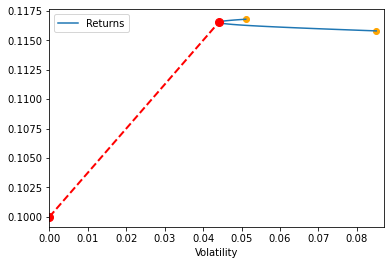

In [55]:
erk.plot_ef(30, er[l], cov.loc[l, l], rf_rate=rf_rate)
erk.msr(rf_rate, er[l], cov.loc[l, l])

array([0.57930354, 0.42069646])

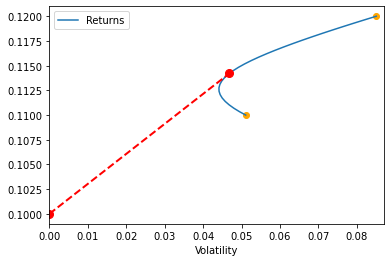

In [56]:
er_estimates = np.array([.11, .12])
erk.plot_ef(30, er_estimates, cov.loc[l, l], rf_rate=rf_rate)
erk.msr(rf_rate, er_estimates, cov.loc[l, l])

array([1., 0.])

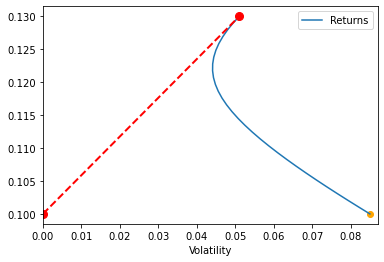

In [58]:
er_estimates = np.array([.13, .10])
erk.plot_ef(30, er_estimates, cov.loc[l, l], rf_rate=rf_rate)
erk.msr(rf_rate, er_estimates, cov.loc[l, l])

array([0., 1.])

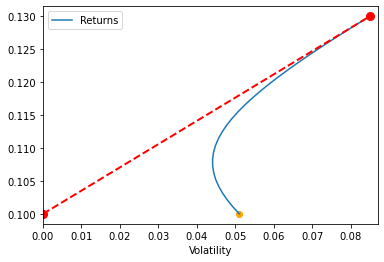

In [59]:
er_estimates = np.array([.10, .13])
erk.plot_ef(30, er_estimates, cov.loc[l, l], rf_rate=rf_rate)
erk.msr(rf_rate, er_estimates, cov.loc[l, l])

**Conclusion**: Being off by just a little bit on expected return estimates gives an entirely different portfolio allocation

array([3.17569760e-15, 7.85903982e-16, 4.22887473e-15, 2.63275178e-15,
       2.63645851e-15, 0.00000000e+00, 0.00000000e+00, 4.55961459e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.73484961e-15, 2.33810851e-01, 0.00000000e+00, 6.00250171e-15,
       0.00000000e+00, 1.38704162e-01, 5.46325746e-15, 8.94091863e-02,
       0.00000000e+00, 0.00000000e+00, 1.55177087e-02, 3.44460529e-16,
       0.00000000e+00, 1.56724080e-15, 6.65966329e-02, 0.00000000e+00,
       2.18533051e-15, 0.00000000e+00])

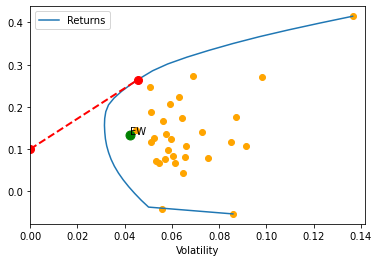

In [64]:
erk.plot_ef(30, er, cov, rf_rate=rf_rate, show_ew=True, )
erk.msr(rf_rate, er, cov)

<AxesSubplot:xlabel='Volatility'>

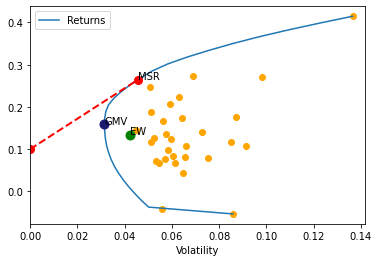

In [67]:
erk.plot_ef(30, er, cov, rf_rate=rf_rate, show_ew=True, show_gmv=True)